<a href="https://colab.research.google.com/github/abhaykumar060/abhay/blob/main/waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


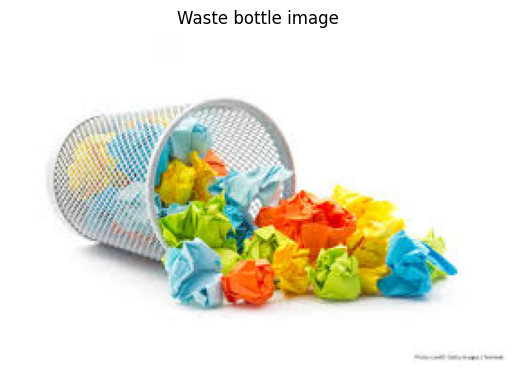

1: hair_slide (0.11)
2: shower_cap (0.09)
3: hamper (0.06)


In [3]:
# Importing required libraries
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNetV2 model
model = tf.keras.applications.MobileNetV2(weights="imagenet")

# Load the image of waste bottle
img_path = "/content/waste/images.jpeg"

# Read the image using OpenCV
image = cv2.imread(img_path)

# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to match MobileNetV2 input size
image_resized = cv2.resize(image, (224, 224))

# Normalize the image (scale pixel values to [0,1])
image_resized = image_resized / 255.0

# Expand dimensions to fit model input shape
image_resized = np.expand_dims(image_resized, axis=0)

# Predict on the image
prediction = model.predict(image_resized)

# Decode the predictions
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(prediction, top=3)[0]

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title("Waste bottle image")
plt.show()

# Print top-3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")